<a href="https://colab.research.google.com/github/raziq0835/ML_Basics/blob/main/Nureal_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Traning data shape(60000, 28, 28)
Traning label shape(60000,)
Testing data shape(10000, 28, 28)
Testing label shape(10000,)
Number  of classes 10


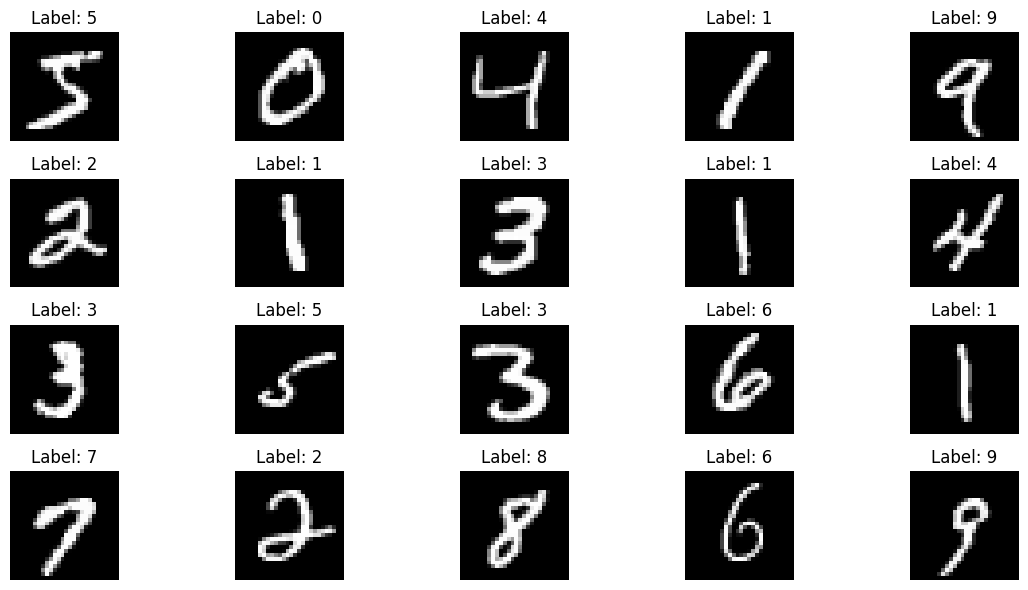

In [3]:
(x_train_tf,y_train_tf),(x_test_tf,y_test_tf) = keras.datasets.mnist.load_data()

print(f'Traning data shape{x_train_tf.shape}')
print(f'Traning label shape{y_train_tf.shape}')
print(f'Testing data shape{x_test_tf.shape}')
print(f'Testing label shape{y_test_tf.shape}')
print(f'Number  of classes {len(np.unique(y_train_tf))}')

# Visualize some sample images
fig, axes = plt.subplots(4, 5, figsize=(12, 6))
for i in range(20):
    ax = axes[i//5, i%5]
    ax.imshow(x_train_tf[i], cmap='gray')
    ax.set_title(f'Label: {y_train_tf[i]}')
    ax.axis('off')
plt.tight_layout()
plt.show()

In [4]:
x_train_tf =x_test_tf.astype('float32')/255.0
x_test_tf =x_test_tf.astype('float32')/255.0

In [5]:
#Data rehapeing
x_train_tf = x_train_tf.reshape(-1,28*28)
x_test_tf = x_test_tf.reshape(-1,28*28)

In [6]:
x_train_tf[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [7]:
x_train_tf[0].shape

(784,)

In [8]:
y_train_cat = keras.utils.to_categorical(y_train_tf,10)
y_test_cat = keras.utils.to_categorical(y_test_tf,10)

In [9]:
y_train_cat[0].shape

(10,)

In [10]:
model_tf = keras.Sequential([
    keras.layers.Dense(128,activation='relu',input_shape=(784,)),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

print(model_tf.summary())

plot_model(model_tf, to_file="model_plot.png", show_shapes=True, show_layer_names=True)

model_tf.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

None


In [11]:
history_tf = model_tf.fit(x_train_tf,y_train_cat,batch_size=32 ,epochs=50,validation_split=0.2)

Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1047 - loss: 2.3204 - val_accuracy: 0.0995 - val_loss: 2.3071
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.1224 - loss: 2.2919 - val_accuracy: 0.1110 - val_loss: 2.3163
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.1289 - loss: 2.2865 - val_accuracy: 0.1040 - val_loss: 2.3072
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1444 - loss: 2.2667 - val_accuracy: 0.1080 - val_loss: 2.3191
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1782 - loss: 2.2348 - val_accuracy: 0.1095 - val_loss: 2.3454
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1883 - loss: 2.2034 - val_accuracy: 0.1115 - val_loss: 2.3936
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2138 - loss: 2.1603 - val_accuracy: 0.1110 - val_loss: 2.3955
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2470 - loss: 2.1006 - val_accuracy: 0

In [12]:
test_loss_tf,test_acc_tf = model_tf.evaluate(x_test_tf,y_test_cat)
print(f"Test Accuracy: {test_acc_tf*100:.2f}%")
print(f"Test Loss: {test_loss_tf*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0961 - loss: 9.6803
Test Accuracy: 9.90%
Test Loss: 923.86%


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


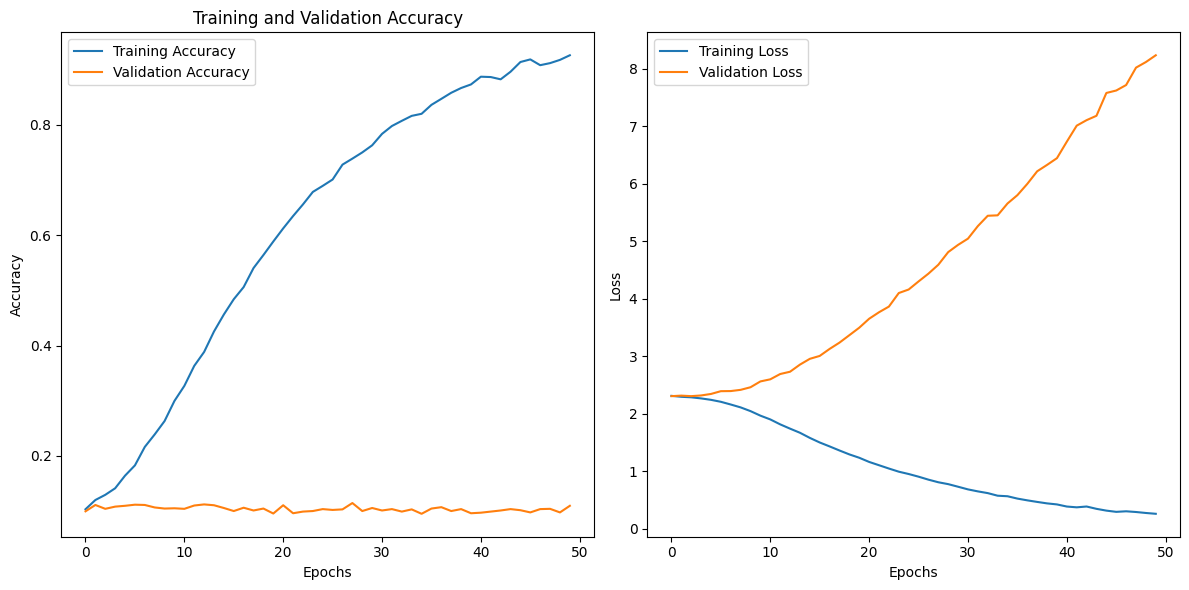

In [13]:
predictions_tf = model_tf.predict(x_test_tf)
predicted_classes_tf = np.argmax(predictions_tf,axis=1)
true_classes_tf =np.argmax(y_test_cat,axis=1)

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,6))

ax1.plot(history_tf.history['accuracy'],label='Training Accuracy')
ax1.plot(history_tf.history['val_accuracy'],label='Validation Accuracy')

ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.set_title('Training and Validation Accuracy')
ax1.legend()

ax2.plot(history_tf.history['loss'],label='Training Loss')
ax2.plot(history_tf.history['val_loss'],label='Validation Loss')

ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()

plt.tight_layout()
plt.show()

In [14]:
# Experiment 1: Different network architectures
def create_model(architecture):
    model = keras.Sequential()
    model.add(keras.layers.InputLayer(input_shape=(784,)))

    for units in architecture:
        model.add(keras.layers.Dense(units, activation='relu'))

    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

architectures = [
    [64],
    [128, 64],
    [256, 128, 64],
]

for i, arch in enumerate(architectures):
    print(f"\nTraining model with architecture: {arch}")

    # Create model
    model = create_model(arch)
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Train model
    history = model.fit(x_train_tf, y_train_cat,
                        epochs=5,  # Fewer epochs for quick experimentation
                        batch_size=32,
                        validation_split=0.1,
                        verbose=0)

    # Evaluate model
    test_loss, test_accuracy = model.evaluate(x_test_tf, y_test_cat, verbose=0)


Training model with architecture: [64]

Training model with architecture: [128, 64]

Training model with architecture: [256, 128, 64]


In [16]:
def create_model(architecture):
  model = keras.Sequential()
  for units in architecture:
    model.add(keras.layers.Dense(units,activation='relu'))

  model.add(keras.layers.Dense(10,activation='softmax'))
  return model

architectures =[
    [64],
    [128,64],
    [256,128,64]
]

results = []

for i,arch in enumerate(architectures):
  print(f"Training model with architecture {arch}")

  model = create_model(arch)
  model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history = model.fit(x_trainx_train_flat,y_trainx_cat,epochs=20,validation_split=0.1,verbose=1)

test_loss,test_accuracy = model.evaluate(x_test_flat,y_test_cat)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

Training model with architecture [64]
Training model with architecture [128, 64]
Training model with architecture [256, 128, 64]


NameError: name 'x_trainx_train_flat' is not defined